In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

# Загрузка данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Обработка данных
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Изменение размерности изображений
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Преобразования целочисленных меток в бинарные векторы
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [2]:
# Загрузка сверточной основы VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

# Создание модели
model = Model(inputs=base_model.input, outputs=x)

# Компиляция модели
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
x_train_resized = tf.image.resize(x_train, (32, 32))
x_test_resized = tf.image.resize(x_test, (32, 32))

x_train_resized = tf.tile(x_train_resized, [1, 1, 1, 3])
x_test_resized = tf.tile(x_test_resized, [1, 1, 1, 3])

# Обучение модели
model.fit(x_train_resized, y_train, batch_size=128, epochs=10, validation_data=(x_test_resized, y_test))

Epoch 1/10



469/469 [==============================] - 100s 211ms/step - loss: 0.5864 - accuracy: 0.7965 - val_loss: 0.4644 - val_accuracy: 0.8339
Epoch 2/10
469/469 [==============================] - 107s 229ms/step - loss: 0.4231 - accuracy: 0.8458 - val_loss: 0.4262 - val_accuracy: 0.8463
Epoch 3/10
469/469 [==============================] - 108s 231ms/step - loss: 0.3887 - accuracy: 0.8589 - val_loss: 0.4114 - val_accuracy: 0.8516
Epoch 4/10
469/469 [==============================] - 105s 224ms/step - loss: 0.3658 - accuracy: 0.8652 - val_loss: 0.3937 - val_accuracy: 0.8604
Epoch 5/10
469/469 [==============================] - 107s 228ms/step - loss: 0.3502 - accuracy: 0.8711 - val_loss: 0.3825 - val_accuracy: 0.8621
Epoch 6/10
469/469 [==============================] - 98s 210ms/step - loss: 0.3358 - accuracy: 0.8765 - val_loss: 0.3707 - val_accuracy: 0.8657
Epoch 7/10
469/469 [==============================] - 96s 205ms/step - loss: 0.3247 - accuracy: 0.8801 - val_loss: 0.3760 - val_accuracy

In [7]:
# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(x_test_resized, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8675000071525574


Epoch 1/5
750/750 [==============================] - 96s 128ms/step - loss: 0.9829 - accuracy: 0.7130 - val_loss: 0.6437 - val_accuracy: 0.7866
Epoch 2/5
750/750 [==============================] - 95s 127ms/step - loss: 0.5769 - accuracy: 0.8041 - val_loss: 0.5481 - val_accuracy: 0.8094
Epoch 3/5
750/750 [==============================] - 98s 131ms/step - loss: 0.5092 - accuracy: 0.8229 - val_loss: 0.5037 - val_accuracy: 0.8217
Epoch 4/5
750/750 [==============================] - 95s 127ms/step - loss: 0.4726 - accuracy: 0.8337 - val_loss: 0.4787 - val_accuracy: 0.8290
Epoch 5/5
750/750 [==============================] - 95s 127ms/step - loss: 0.4487 - accuracy: 0.8405 - val_loss: 0.4603 - val_accuracy: 0.8368


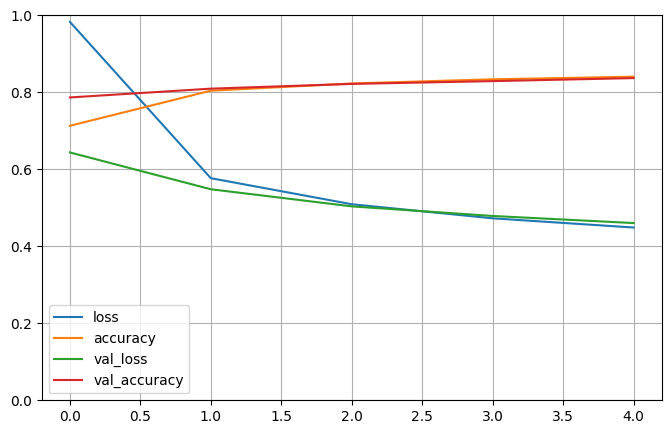

InvalidArgumentError: Graph execution error:

Detected at node sequential_2/vgg16/layer_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1077, in launch_instance

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 529, in dispatch_queue

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 518, in process_one

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 424, in dispatch_shell

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 766, in execute_request

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code

  File "C:\Users\Алексей\AppData\Local\Temp\ipykernel_21664\919762732.py", line 59, in <module>

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2296, in evaluate

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 4108, in run_step

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2066, in test_function

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2049, in step_function

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2037, in run_step

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1917, in test_step

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 321, in call

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\activations.py", line 306, in relu

  File "C:\Users\Алексей\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5395, in relu

input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node sequential_2/vgg16/layer_1/Relu}}]] [Op:__inference_test_function_46984]

In [11]:
# Дообучение последних трех слоев
for i, layer in enumerate(model.layers):
    layer._name = 'layer_' + str(i)

base_model.trainable = True
set_trainable = False
for layer in base_model.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model = Sequential([
   base_model,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

# Компиляция модели
modified_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Изменение размера исходных данных до (32, 32)
x_train_resized = tf.image.resize(x_train, (32, 32))

# Добавление дополнительных каналов
x_train_resized = tf.tile(x_train_resized, [1, 1, 1, 3])

# Обучение модели
history_modified = modified_model.fit(
    x_train_resized,
    y_train,
    epochs=5,
    verbose=1,
    batch_size=64,
    validation_split=0.2
)


In [12]:
#Оценка результатов
test_loss, test_accuracy = modified_model.evaluate(x_test_resized, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8352000117301941


Сравнивая обычную сверточную сеть с сверточной сетью, использующей VGG16 в качестве основы, мы можем заметить, что обычная сверточная сеть показала более высокую точность. Дообучение так же не дало повышения точности модели. 